In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.size"] = 12

## Разделение данных по классам

In [2]:
imgfolder = '../../data/images'
df = pd.read_csv('../../data/all.csv')
df.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [3]:
#удаление изображений с несколькими дефектами
df['ImageId'] = df['ImageId'].astype(str)
df = df.drop_duplicates(subset='ImageId', keep=False)
df = df.set_index('ImageId')
df

,ClassId,EncodedPixels
ImageId,,
0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...
...,...,...
ffcf72ecf.jpg,3,121911 34 122167 101 122422 169 122678 203 122...
fff02e9c5.jpg,3,207523 3 207777 9 208030 15 208283 22 208537 2...
fffe98443.jpg,3,105929 5 106177 14 106424 24 106672 33 106923 ...


In [4]:
#расширение таблицы для включения записей об изображениях без дефектов
all_idx = os.listdir(imgfolder)
current_idx = df.index.tolist()
new_idx = list(set(all_idx)-set(current_idx))
new_df = pd.DataFrame(index=new_idx, columns=['ClassId'])
new_df['ClassId'] = 0
df = pd.concat([df, new_df], axis=0)
df = df.loc[:,:'ClassId']
df['img'] = df.index
df

,ClassId,img
0002cc93b.jpg,1,0002cc93b.jpg
0007a71bf.jpg,3,0007a71bf.jpg
000a4bcdd.jpg,1,000a4bcdd.jpg
000f6bf48.jpg,4,000f6bf48.jpg
0014fce06.jpg,3,0014fce06.jpg
...,...,...
73d4dae19.jpg,0,73d4dae19.jpg
1c2a39896.jpg,0,1c2a39896.jpg
6ad48f01b.jpg,0,6ad48f01b.jpg
5b3910316.jpg,0,5b3910316.jpg


In [5]:
#подсчет статистик по дефектам
def stat(df):
    img_num = len(df)
    defects_num = sum(df['ClassId'] > 0)
    print('the number of images: {}'.format(img_num))
    print('with no defects: {}'.format(img_num - defects_num))
    print('with defects: {}\n'.format(defects_num))
    y = []
    for i in range(5):
        n = len(df[df['ClassId'] == i])
        print('with {} defects class: {}'.format(i, n))
        y.append(n)

    fig, ax = plt.subplots()
    sns.barplot(x=[0,1,2,3,4], y=y, ax=ax)
    ax.set_title("the number of images for each class")
    ax.set_xlabel("class");

the number of images: 12568
with no defects: 6329
with defects: 6239

with 0 defects class: 6329
with 1 defects class: 769
with 2 defects class: 195
with 3 defects class: 4759
with 4 defects class: 516


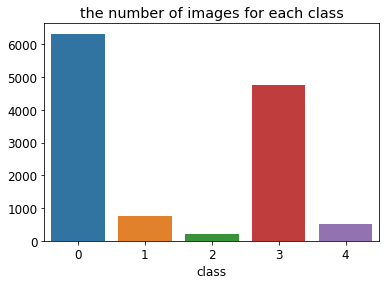

In [6]:
stat(df)

In [7]:
#разделение на train, val и test
train = []
val = []
test = []
repeat = [1, 6, 20, 1, 9]
for i in range(5):
    tmp_df = df[df['ClassId'] == i]
    tmp_train, tmp_val, tmp_test = np.split(tmp_df.sample(frac=1), [int(.6*len(tmp_df)), int(.8*len(tmp_df))])
    train.append(pd.DataFrame(np.repeat(tmp_train.to_numpy(), repeat[i], axis=0), columns=['ClassId','img']))
    val.append(pd.DataFrame(np.repeat(tmp_val.to_numpy(), repeat[i], axis=0), columns=['ClassId','img']))
    test.append(tmp_test)

the number of images: 2515
with no defects: 1266
with defects: 1249

with 0 defects class: 1266
with 1 defects class: 154
with 2 defects class: 39
with 3 defects class: 952
with 4 defects class: 104


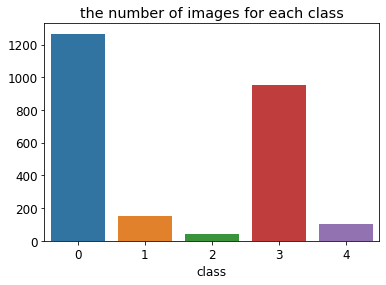

In [8]:
test_df = pd.concat(test, axis=0)
test_df.reset_index()
stat(test_df)
test_df.to_csv('../../data/test.csv', index=False)

the number of images: 14539
with no defects: 3797
with defects: 10742

with 0 defects class: 3797
with 1 defects class: 2766
with 2 defects class: 2340
with 3 defects class: 2855
with 4 defects class: 2781


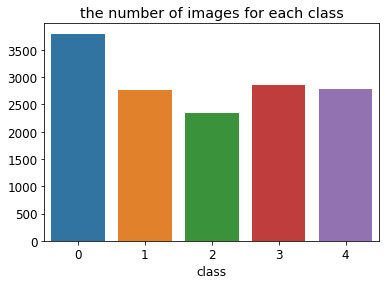

In [9]:
train_df = pd.concat(train, axis=0)
stat(train_df)
train_df.to_csv('../../data/train.csv', index=False)

the number of images: 4849
with no defects: 1266
with defects: 3583

with 0 defects class: 1266
with 1 defects class: 924
with 2 defects class: 780
with 3 defects class: 952
with 4 defects class: 927


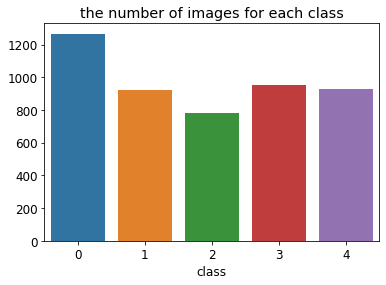

In [10]:
val_df = pd.concat(val, axis=0)
stat(val_df)
val_df.to_csv('../../data/val.csv', index=False)

In [16]:
df = pd.read_csv('../../data/train.csv')
df.head()

,ClassId,img
0,0,b5ad8fb0f.jpg
1,0,21318dbb2.jpg
2,0,afdf9c916.jpg
3,0,467ba206c.jpg
4,0,f4818a932.jpg
